In [1]:
# from ultralytics import YOLO
# yolomodel = YOLO("yolov8n.pt")  # load a pretrained model

In [2]:
from tensorflow import keras
model = keras.models.load_model('./model_final')

In [3]:
# import cv2

# videoCaptureObject = cv2.VideoCapture(0)
# result = True
# while(result):
#     ret,frame = videoCaptureObject.read()
#     cv2.imwrite("4.jpg",frame)
#     result = False
# videoCaptureObject.release()
# cv2.destroyAllWindows()

In [4]:
import PIL
import tensorflow as tf
from PIL import Image
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import img_to_array
import numpy as np
import matplotlib.pyplot as plt
import PIL

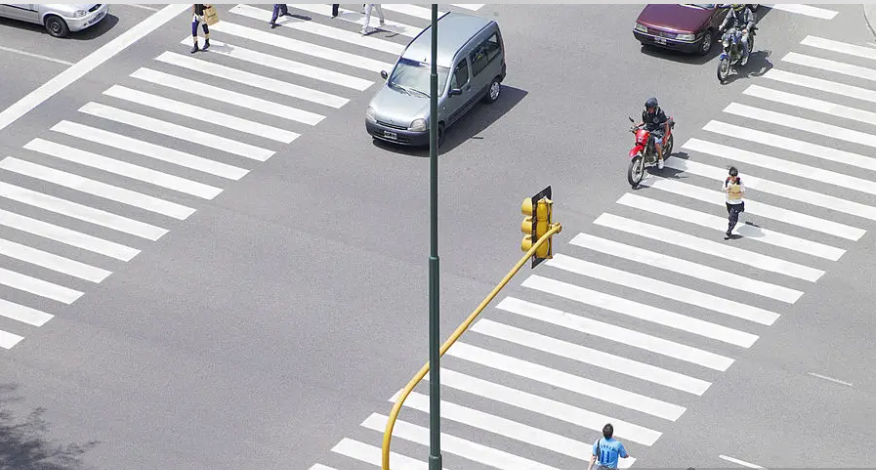

In [5]:
from tensorflow.keras.utils import load_img
from PIL import Image
import IPython.display as display
img = load_img("2.png")
display.display(img)

In [6]:
def get_lowres_image(img, upscale_factor):
 """Return low-resolution image to use as model input."""
 return img.resize(
 (img.size[0] // upscale_factor, img.size[1] // upscale_factor),
 PIL.Image.BICUBIC,
 )

In [7]:
def upscale_image(model, img):
 """Predict the result based on input image and restore the image as RGB."""
 ycbcr = img.convert("YCbCr")
 y, cb, cr = ycbcr.split()
 y = img_to_array(y)
 y = y.astype("float32") / 255.0
 input = np.expand_dims(y, axis=0)
 out = model.predict(input)
 out_img_y = out[0]
 out_img_y *= 255.0
 # Restore the image in RGB color space.
 out_img_y = out_img_y.clip(0, 255)
 out_img_y = out_img_y.reshape((np.shape(out_img_y)[0], np.shape(out_img_y)[1]))
 out_img_y = PIL.Image.fromarray(np.uint8(out_img_y), mode="L")
 out_img_cb = cb.resize(out_img_y.size, PIL.Image.BICUBIC)
 out_img_cr = cr.resize(out_img_y.size, PIL.Image.BICUBIC)
 out_img = PIL.Image.merge("YCbCr", (out_img_y, out_img_cb,out_img_cr)).convert(
 "RGB")
 return out_img

1/1 [==============================] - 0s 104ms/step
PSNR of low resolution image and high resolution image is 28.3680
PSNR of prediction and high resolution is 31.1505
highres_img


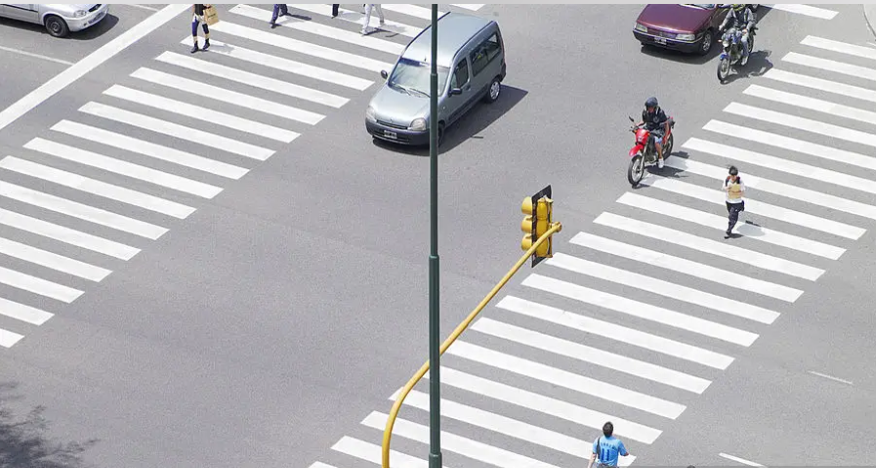

lowres_img


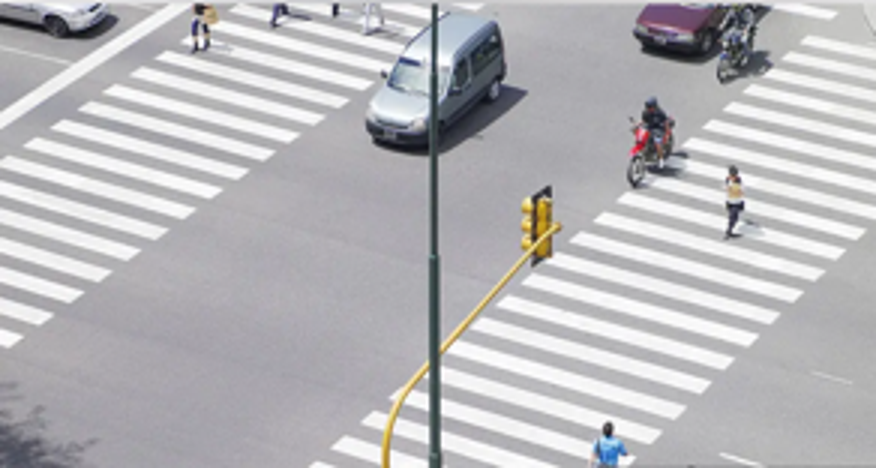

prediction


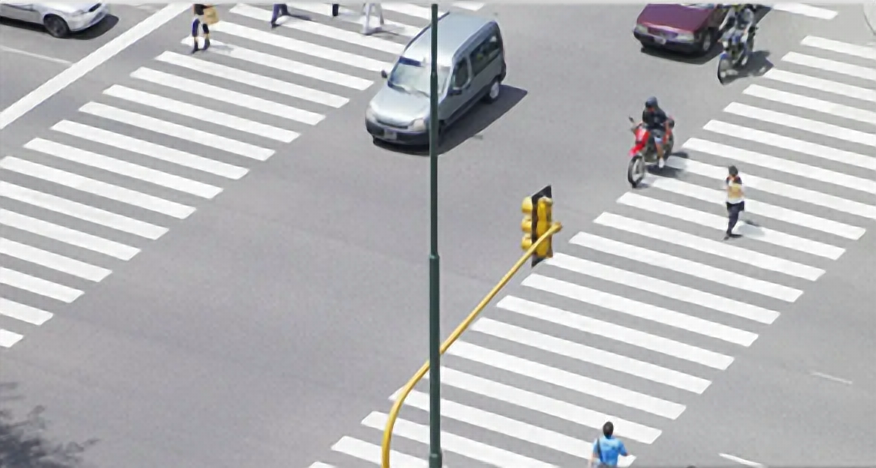

In [8]:
# img = load_img(test_img_path)
upscale_factor=3

total_bicubic_psnr = 0.0
total_test_psnr = 0.0

lowres_input = get_lowres_image(img, upscale_factor)
w = lowres_input.size[0] * upscale_factor
h = lowres_input.size[1] * upscale_factor
highres_img = img.resize((w, h))
prediction = upscale_image(model, lowres_input)
lowres_img = lowres_input.resize((w, h))
lowres_img_arr = img_to_array(lowres_img)
highres_img_arr = img_to_array(highres_img)
predict_img_arr = img_to_array(prediction)
bicubic_psnr = tf.image.psnr(lowres_img_arr, highres_img_arr, max_val=255)
test_psnr = tf.image.psnr(predict_img_arr, highres_img_arr, max_val=255)
total_bicubic_psnr += bicubic_psnr
total_test_psnr += test_psnr
print(
"PSNR of low resolution image and high resolution image is %.4f" % bicubic_psnr
)
print("PSNR of prediction and high resolution is %.4f" % test_psnr)
# plot_results(lowres_img, 0, "lowres")
# plot_results(highres_img, 0, "highres")
# plot_results(prediction, 0, "prediction")
print("highres_img")
display.display(highres_img)

print("lowres_img")
display.display(lowres_img)

print("prediction")
display.display(prediction)

highres_img.save("highres_img.jpg")
lowres_img.save("lowres_img.jpg")
prediction.save("prediction.jpg")

In [20]:
# from ultralytics import YOLO

In [9]:
results = yolomodel("prediction.jpg")  # predict on an image


image 1/1 C:\Users\abhay\ESPCNK\prediction.jpg: 352x640 4 persons, 3 cars, 3 motorcycles, 2 traffic lights, 161.7ms
Speed: 12.2ms preprocess, 161.7ms inference, 15.0ms postprocess per image at shape (1, 3, 640, 640)


In [10]:
!yolo task=detect mode=predict model=yolov8n.pt  source="highres_img.jpg"
!yolo task=detect mode=predict model=yolov8n.pt  source="lowres_img.jpg
!yolo task=detect mode=predict model=yolov8n.pt  source="prediction.jpg

Ultralytics YOLOv8.0.90  Python-3.8.16 torch-2.0.0+cpu CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 C:\Users\abhay\ESPCNK\highres_img.jpg: 352x640 5 persons, 3 cars, 2 motorcycles, 1 traffic light, 227.0ms
Speed: 3.0ms preprocess, 227.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict16
Ultralytics YOLOv8.0.90  Python-3.8.16 torch-2.0.0+cpu CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 C:\Users\abhay\ESPCNK\lowres_img.jpg: 352x640 4 persons, 3 cars, 2 motorcycles, 2 traffic lights, 122.0ms
Speed: 3.0ms preprocess, 122.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict17
Ultralytics YOLOv8.0.90  Python-3.8.16 torch-2.0.0+cpu CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 C:\Users\abhay\ESPCNK\prediction.jpg: 352x640 4 persons, 3 ca